In [56]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from graphite_maps.linear_regression import boost_linear_regression

In [57]:
def standardize_data(X, y):
    scaler_X = StandardScaler().fit(X)
    X_scaled = scaler_X.transform(X)
    
    scaler_y = StandardScaler().fit(y.reshape(-1, 1))
    y_scaled = scaler_y.transform(y.reshape(-1, 1)).flatten()
    
    return X_scaled, y_scaled, scaler_X, scaler_y

# generate data
#np.random.seed(42)
n = 100
p_noisy = 999999
X1 = np.random.rand(n, 1)
X2 = np.random.rand(n, 1)
X3 = np.random.rand(n, 1)
X = np.hstack((X1, X2, X3))

In [58]:
y = 1 * X[:,0] - X[:,1] + X[:,2] + np.random.randn(n) * 1e-2  # True relationship with some noise

# Generate 9 additional noise features
noise_features = np.random.rand(n, p_noisy)  # 100 samples, 9 noise features

# Concatenate the noise features with the original feature
X_with_noise = np.hstack((X, noise_features))
#print(X_with_noise.shape)

# Standardize the expanded dataset (with noise features) and the target variable
X_with_noise_scaled, y_scaled, scaler_X, scaler_y = standardize_data(X_with_noise, y)

In [59]:
# Apply the updated function with learning rate to the standardized data with noise features
max_iter = 10000
coefficients_with_noise_lr = boost_linear_regression(
    X = X_with_noise_scaled, 
    y = y_scaled, 
    learning_rate=0.5, 
    max_iter=max_iter
)
print(coefficients_with_noise_lr.nonzero()[0].shape)
ind = coefficients_with_noise_lr.nonzero()
print(ind)
print(coefficients_with_noise_lr[ind])

(3,)
(array([0, 1, 2]),)
[ 0.51305584 -0.56333945  0.56452084]


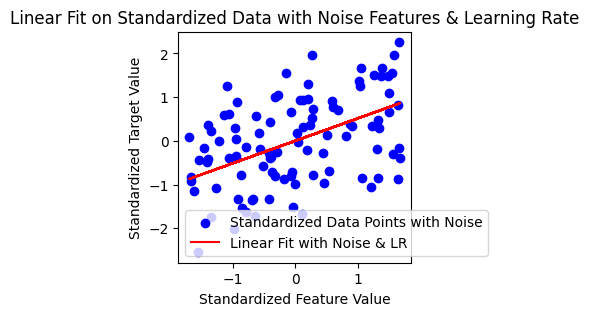

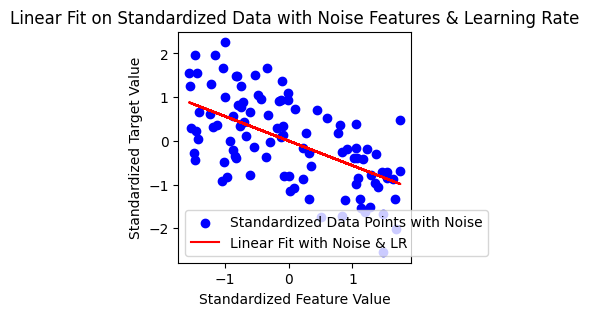

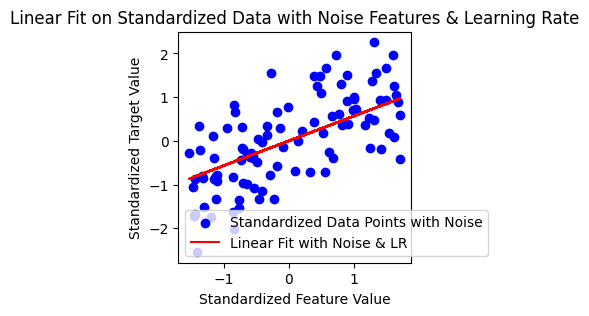

In [60]:
# Plot the original data and the linear fit with standardized coefficients, including noise features and learning rate
for ind in range(3):
    plt.figure(figsize=(3, 3))
    plt.scatter(X_with_noise_scaled[:, ind], y_scaled, color='blue', label='Standardized Data Points with Noise')
    plt.plot(X_with_noise_scaled[:, ind], np.dot(X_with_noise_scaled[:,ind], coefficients_with_noise_lr[ind]), color='red', label='Linear Fit with Noise & LR')
    plt.title('Linear Fit on Standardized Data with Noise Features & Learning Rate')
    plt.xlabel('Standardized Feature Value')
    plt.ylabel('Standardized Target Value')
    plt.legend()
    plt.show()